In [1]:
# Tensorflow
import numpy as np
import pandas as pd
import glob
import imageio
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import time
from IPython import display
from scipy.signal import savgol_filter
from sklearn.model_selection import train_test_split

2024-11-19 23:37:40.203973: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 23:37:40.215011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732034260.228717  245440 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732034260.232803  245440 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 23:37:40.246968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Data

In [2]:
data = pd.read_csv("/home/sonn/Sonn/Workspace/Projects/GANSpectralDataAugmentation/data/UV_Vis_NuocCam_ChuaDaoHam.csv")

In [3]:
data.head()

,TenMau,DiaPhuong,NamLayMau,Giong,1000,995,990,985,980,975,...,300,295,290,285,280,275,270,265,260,255
0,BG.23.Vinh.01,Bắc Giang,2023,Vinh,0.672,0.670,0.667,0.666,0.664,0.663,...,1.787,1.860,1.948,2.032,2.091,2.121,2.134,2.144,2.157,2.182
1,BG.23.Vinh.02,Bắc Giang,2023,Vinh,1.219,1.221,1.221,1.221,1.220,1.219,...,2.295,2.370,2.462,2.551,2.611,2.627,2.608,2.567,2.516,2.479
2,BG.23.Vinh.04,Bắc Giang,2023,Vinh,1.241,1.240,1.240,1.240,1.237,1.235,...,2.647,2.717,2.815,2.932,3.064,3.208,3.375,3.583,3.848,4.157
3,BG.23.Vinh.05,Bắc Giang,2023,Vinh,1.297,1.298,1.300,1.301,1.300,1.301,...,2.417,2.479,2.559,2.641,2.714,2.773,2.828,2.889,2.955,3.024
4,BG.23.Vinh.07,Bắc Giang,2023,Vinh,1.311,1.312,1.314,1.312,1.310,1.307,...,2.428,2.516,2.631,2.755,2.858,2.922,2.950,2.951,2.939,2.934


In [4]:
y = data['DiaPhuong']

In [5]:
X = data.iloc[:, 4:]

(0.0, 149.0)

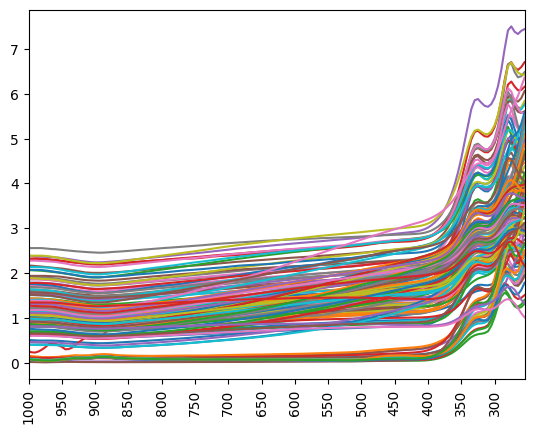

In [6]:
plt.plot(X.T)
plt.xticks(X.columns[::10], rotation=90)
plt.xlim(X.columns[0], X.columns[-1])

In [7]:
X = savgol_filter(X, window_length=5, polyorder=2, deriv=1)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

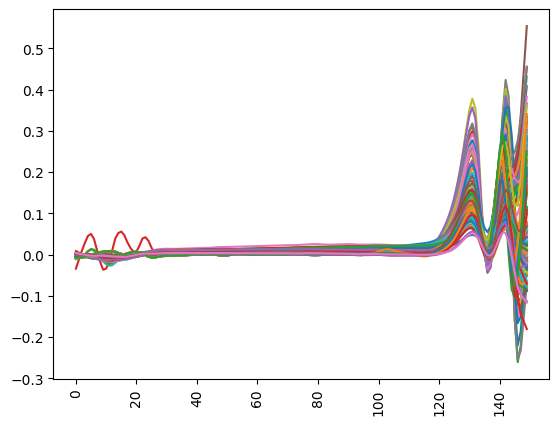

In [8]:
plt.plot(X.T)
plt.xticks(rotation=90)

In [9]:
X[y == 'Bắc Giang']

array([[-2.57142857e-03, -2.28571429e-03, -2.00000000e-03, ...,
         1.45000000e-02,  1.83571429e-02,  2.22142857e-02],
       [ 1.91428571e-03,  1.05714286e-03,  2.00000000e-04, ...,
        -3.88000000e-02, -4.53714286e-02, -5.19428571e-02],
       [ 3.42857143e-04, -2.28571429e-04, -8.00000000e-04, ...,
         2.37100000e-01,  2.85814286e-01,  3.34528571e-01],
       ...,
       [ 2.65714286e-03,  1.22857143e-03, -2.00000000e-04, ...,
         1.30000000e-03, -9.98571429e-03, -2.12714286e-02],
       [ 3.08571429e-03,  1.94285714e-03,  8.00000000e-04, ...,
         5.81000000e-02,  6.31000000e-02,  6.81000000e-02],
       [ 2.08571429e-03,  9.42857143e-04, -2.00000000e-04, ...,
        -7.08000000e-02, -6.96571429e-02, -6.85142857e-02]])

In [10]:
X.shape

(147, 150)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 150), (30, 150), (117,), (30,))

In [12]:
# X_der = X_der.reshape(X_der.shape[0], X_der.shape[1], 1)

In [13]:
# X_der.shape

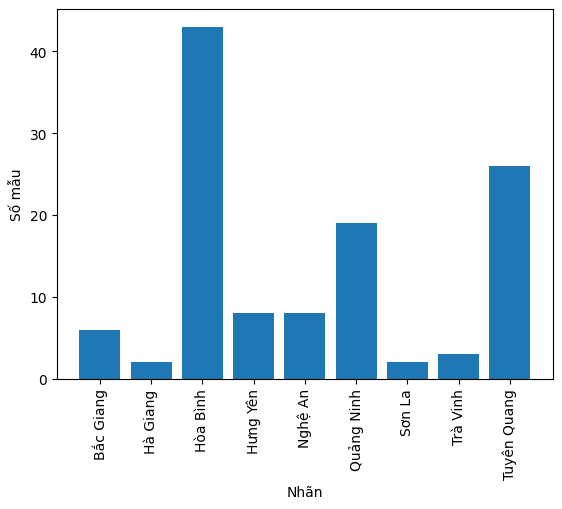

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Nhãn')
plt.xticks(rotation=90)
plt.ylabel('Số mẫu')
plt.show()

In [15]:
X_train.shape

(117, 150)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
X_train.shape

(117, 150, 1)

In [18]:
noise_dim = 100
length = X_train.shape[1]
feature_dim = X_train.shape[1]


In [19]:
feature_dim

150

Model

In [20]:
LENGTH = length
BATCH_SIZE = 8
EPOCHS = 100
Z_DIM = noise_dim

In [21]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Input({noise_dim}))
    #model.add(layers.Input(shape=(noise_dim,)))
      
    # Fully Connected Layers
    #(opt) (number of nodes can change and activation may be relu or leaky relu)
    
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))   
    
    model.add(layers.Dense(256, activation="leaky_relu"))    
    model.add(layers.Dense(feature_dim))
    model.compile()
    
    print(model.output_shape)
    assert model.output_shape == (None, feature_dim)               

    return model

In [22]:
generator = make_generator_model()
generator.summary()

I0000 00:00:1732034263.993184  245440 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


(None, 150)


/home/sonn/anaconda3/envs/WSAIPython3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │        38,550 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,014 (332.09 KB)

 Trainable params: 84,758 (331.09 KB)

 Non-trainable params: 256 (1.00 KB)

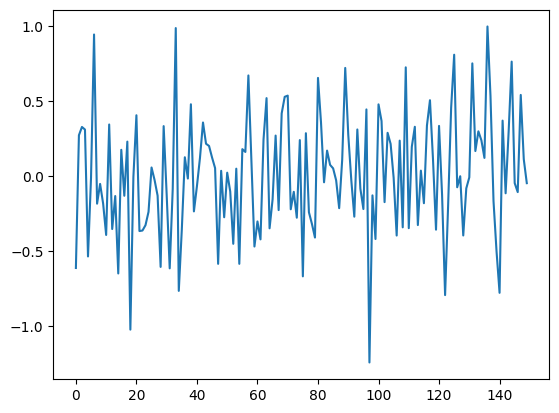

In [23]:
noise = tf.random.normal([1, noise_dim])
generated_data = generator(noise, training=False)
generated_data_ = generated_data.numpy().reshape(-1).tolist()
plt.plot(generated_data_)

In [24]:
generated_data.shape

TensorShape([1, 150])

In [25]:
def make_discriminator_model():
    
    model = tf.keras.Sequential()
    
    model.add(layers.Input(shape={feature_dim}))
    model.add(layers.Reshape([feature_dim, 1]))
    model.add(layers.Conv1D(kernel_size= 15, filters= 256, activation='leaky_relu'))  
    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                      
    
    model.add(layers.Conv1D(kernel_size= 15, filters= 128))   
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
        
    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                     

    model.add(layers.Flatten())
    model.add(layers.Dense(64))                                                       
    model.add(layers.Dense(1))
    model.compile()
    
    return model

In [26]:
discriminator = make_discriminator_model()          
decision = discriminator(generated_data)            
print (decision)                                
discriminator.summary()

I0000 00:00:1732034264.910155  245440 cuda_dnn.cc:529] Loaded cuDNN version 90300


tf.Tensor([[-0.02512591]], shape=(1, 1), dtype=float32)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 150, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 136, 256)       │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 68, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 68, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 54, 128)        │       491,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 54, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       221,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,569 (2.74 MB)

 Trainable params: 717,313 (2.74 MB)

 Non-trainable params: 256 (1.00 KB)

In [27]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)


def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [28]:
seed = tf.random.normal([1, noise_dim])        

def generate_data(model, num_synthetic_to_gen=1):
  noise_input = tf.random.normal([num_synthetic_to_gen, noise_dim])
  predictions = model(noise_input, training=False)
  predictions = predictions.numpy()
  return predictions

def calc_accuracy(prediction):
  correct_predictions = tf.cast(prediction < 0.5, tf.float32)
  accuracy = tf.reduce_mean(correct_predictions)
  return accuracy

In [29]:
numofEPOCHS = 8000
BATCH_SIZE = 12 

In [30]:
def draw_training_evolution(model, epoch, noise_input= noise):
  predictions = model(noise_input, training=False)
  
  for i in range(predictions.shape[0]):
        fig = plt.figure()
        plt.plot(predictions[i].numpy().tolist())
        plt.savefig('../reports/ConvNetDisGANtraining/image_at_epoch_{:04d}_{:04d}.png'.format(epoch, i))
        plt.close()

In [31]:

def train_step(data, generator, discriminator, generator_optimizer, discriminator_optimizer):
    noise = tf.random.normal([BATCH_SIZE, noise_dim], seed=42)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_data = generator(noise, training=True)

      real_output = discriminator(data, training=True)
      fake_output = discriminator(generated_data, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      acc = calc_accuracy(fake_output)
     
        

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, acc

def train(dataset, epochs, generator, discriminator, generator_optimizer, discriminator_optimizer):
  
  for epoch in range(epochs):
    start_time = time.time()

    gen_losses, disc_losses, accuracies = [], [], []

    for data_batch in dataset:
      gen_loss, disc_loss, acc = train_step(data_batch, generator, discriminator, generator_optimizer, discriminator_optimizer)
      accuracies.append(acc)
      gen_losses.append(gen_loss)
      disc_losses.append(disc_loss)

    epoch_gen_loss  = np.average(gen_losses)
    epoch_disc_loss = np.average(disc_losses)
    epoch_accuracy = np.average(accuracies)

    if (epoch + 1) % 100 == 0:
      draw_training_evolution(generator, epoch+1)
   
    print("Epoch: {}/{}".format(epoch+1, epochs))
    print("Generator Loss: {}, Discriminator Loss: {}".format(epoch_gen_loss, epoch_disc_loss))
    print("Accuracy: {}".format(epoch_accuracy))
    print(f"Epoch time: {(time.time() - start_time) * 1000}" )
        

In [32]:
for name in ['Bắc Giang']:
    X_tmp = X_train[y_train == name]
    generator = make_generator_model()
    discriminator = make_discriminator_model()
    generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    data_size = X_tmp.shape[0]        
    train_dataset = tf.data.Dataset.from_tensor_slices(X_tmp).shuffle(data_size).batch(BATCH_SIZE)  
    train(train_dataset, numofEPOCHS, generator, discriminator, generator_optimizer, discriminator_optimizer)
    generator.save(f"../models/ConvNetDisGAN_{name}_epoch_{numofEPOCHS}.h5")

(None, 150)


2024-11-19 23:37:47.559512: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-19 23:37:47.670232: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 1/8000
Generator Loss: 0.209372416138649, Discriminator Loss: 3.0535569190979004
Accuracy: 0.1666666716337204
Epoch time: 2210.606575012207
Epoch: 2/8000
Generator Loss: 2.6985855102539062, Discriminator Loss: 0.8004255890846252
Accuracy: 1.0
Epoch time: 110.82696914672852
Epoch: 3/8000
Generator Loss: 4.893980503082275, Discriminator Loss: 0.6902602910995483
Accuracy: 1.0
Epoch time: 95.98875045776367
Epoch: 4/8000
Generator Loss: 5.842756271362305, Discriminator Loss: 0.6478233933448792
Accuracy: 1.0
Epoch time: 105.15046119689941
Epoch: 5/8000
Generator Loss: 6.839483261108398, Discriminator Loss: 0.5989049673080444
Accuracy: 1.0
Epoch time: 89.91670608520508


2024-11-19 23:37:47.871608: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 6/8000
Generator Loss: 6.893714904785156, Discriminator Loss: 0.5722332000732422
Accuracy: 1.0
Epoch time: 93.51682662963867
Epoch: 7/8000
Generator Loss: 5.999563217163086, Discriminator Loss: 0.5432654023170471
Accuracy: 1.0
Epoch time: 101.07254981994629
Epoch: 8/8000
Generator Loss: 6.261211395263672, Discriminator Loss: 0.4928886294364929
Accuracy: 1.0
Epoch time: 89.87784385681152


2024-11-19 23:37:48.246012: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 9/8000
Generator Loss: 5.643681049346924, Discriminator Loss: 0.47260892391204834
Accuracy: 1.0
Epoch time: 94.14553642272949
Epoch: 10/8000
Generator Loss: 4.125032901763916, Discriminator Loss: 0.4381635785102844
Accuracy: 1.0
Epoch time: 96.6799259185791
Epoch: 11/8000
Generator Loss: 5.1997528076171875, Discriminator Loss: 0.4075927138328552
Accuracy: 1.0
Epoch time: 152.93145179748535
Epoch: 12/8000
Generator Loss: 4.327589988708496, Discriminator Loss: 0.3970174789428711
Accuracy: 1.0
Epoch time: 118.68000030517578
Epoch: 13/8000
Generator Loss: 4.80522346496582, Discriminator Loss: 0.35726937651634216
Accuracy: 1.0
Epoch time: 103.25121879577637
Epoch: 14/8000
Generator Loss: 4.199431896209717, Discriminator Loss: 0.36321866512298584
Accuracy: 1.0
Epoch time: 89.54191207885742
Epoch: 15/8000
Generator Loss: 4.593748092651367, Discriminator Loss: 0.32755038142204285
Accuracy: 1.0
Epoch time: 86.56144142150879


2024-11-19 23:37:49.104749: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 16/8000
Generator Loss: 4.379048824310303, Discriminator Loss: 0.3311099410057068
Accuracy: 1.0
Epoch time: 117.10619926452637
Epoch: 17/8000
Generator Loss: 4.383882999420166, Discriminator Loss: 0.2940850257873535
Accuracy: 1.0
Epoch time: 121.85430526733398
Epoch: 18/8000
Generator Loss: 3.6667816638946533, Discriminator Loss: 0.30881378054618835
Accuracy: 1.0
Epoch time: 96.42195701599121
Epoch: 19/8000
Generator Loss: 4.180134296417236, Discriminator Loss: 0.29515203833580017
Accuracy: 1.0
Epoch time: 100.82578659057617
Epoch: 20/8000
Generator Loss: 4.8824992179870605, Discriminator Loss: 0.3401493728160858
Accuracy: 0.9166666865348816
Epoch time: 103.71160507202148
Epoch: 21/8000
Generator Loss: 5.843505382537842, Discriminator Loss: 0.27395910024642944
Accuracy: 1.0
Epoch time: 107.40947723388672
Epoch: 22/8000
Generator Loss: 6.032841205596924, Discriminator Loss: 0.2972341477870941
Accuracy: 1.0
Epoch time: 86.88092231750488
Epoch: 23/8000
Generator Loss: 5.94549322128

2024-11-19 23:37:50.723586: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 33/8000
Generator Loss: 4.7572855949401855, Discriminator Loss: 0.2159775048494339
Accuracy: 1.0
Epoch time: 107.42545127868652
Epoch: 34/8000
Generator Loss: 6.302240371704102, Discriminator Loss: 0.20243386924266815
Accuracy: 1.0
Epoch time: 101.2721061706543
Epoch: 35/8000
Generator Loss: 4.87186861038208, Discriminator Loss: 0.18155330419540405
Accuracy: 1.0
Epoch time: 105.24439811706543
Epoch: 36/8000
Generator Loss: 4.318286895751953, Discriminator Loss: 0.18435227870941162
Accuracy: 1.0
Epoch time: 108.00886154174805
Epoch: 37/8000
Generator Loss: 5.596782207489014, Discriminator Loss: 0.16427943110466003
Accuracy: 1.0
Epoch time: 98.73056411743164
Epoch: 38/8000
Generator Loss: 4.773032188415527, Discriminator Loss: 0.17076754570007324
Accuracy: 1.0
Epoch time: 96.87590599060059
Epoch: 39/8000
Generator Loss: 5.837099552154541, Discriminator Loss: 0.15759694576263428
Accuracy: 1.0
Epoch time: 93.40286254882812
Epoch: 40/8000
Generator Loss: 5.20768404006958, Discriminat

2024-11-19 23:37:53.798140: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 64/8000
Generator Loss: 7.023655414581299, Discriminator Loss: 0.04881393164396286
Accuracy: 1.0
Epoch time: 88.5155200958252
Epoch: 65/8000
Generator Loss: 6.213049411773682, Discriminator Loss: 0.05931352078914642
Accuracy: 1.0
Epoch time: 111.64355278015137
Epoch: 66/8000
Generator Loss: 7.31403112411499, Discriminator Loss: 0.05291058495640755
Accuracy: 1.0
Epoch time: 93.9493179321289
Epoch: 67/8000
Generator Loss: 7.252756118774414, Discriminator Loss: 0.04295789822936058
Accuracy: 1.0
Epoch time: 98.05488586425781
Epoch: 68/8000
Generator Loss: 7.895462512969971, Discriminator Loss: 0.0370311439037323
Accuracy: 1.0
Epoch time: 96.98081016540527
Epoch: 69/8000
Generator Loss: 7.474298000335693, Discriminator Loss: 0.04043550044298172
Accuracy: 1.0
Epoch time: 96.11368179321289
Epoch: 70/8000
Generator Loss: 6.921558856964111, Discriminator Loss: 0.048464350402355194
Accuracy: 1.0
Epoch time: 93.37687492370605
Epoch: 71/8000
Generator Loss: 7.525880813598633, Discriminator 

2024-11-19 23:37:59.842034: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 129/8000
Generator Loss: 9.8186616897583, Discriminator Loss: 0.010291699320077896
Accuracy: 1.0
Epoch time: 83.16731452941895
Epoch: 130/8000
Generator Loss: 9.245774269104004, Discriminator Loss: 0.006256238091737032
Accuracy: 1.0
Epoch time: 78.39679718017578
Epoch: 131/8000
Generator Loss: 9.322044372558594, Discriminator Loss: 0.005078290589153767
Accuracy: 1.0
Epoch time: 91.14336967468262
Epoch: 132/8000
Generator Loss: 9.343073844909668, Discriminator Loss: 0.007783607114106417
Accuracy: 1.0
Epoch time: 103.47318649291992
Epoch: 133/8000
Generator Loss: 9.565218925476074, Discriminator Loss: 0.008460336364805698
Accuracy: 1.0
Epoch time: 86.58909797668457
Epoch: 134/8000
Generator Loss: 9.036456108093262, Discriminator Loss: 0.00723338732495904
Accuracy: 1.0
Epoch time: 84.90729331970215
Epoch: 135/8000
Generator Loss: 9.063533782958984, Discriminator Loss: 0.008287282660603523
Accuracy: 1.0
Epoch time: 83.50372314453125
Epoch: 136/8000
Generator Loss: 9.680984497070312,

2024-11-19 23:38:10.718525: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 258/8000
Generator Loss: 9.010336875915527, Discriminator Loss: 0.0036893540527671576
Accuracy: 1.0
Epoch time: 77.26120948791504
Epoch: 259/8000
Generator Loss: 8.604941368103027, Discriminator Loss: 0.0053155808709561825
Accuracy: 1.0
Epoch time: 79.3161392211914
Epoch: 260/8000
Generator Loss: 8.655447959899902, Discriminator Loss: 0.003590118605643511
Accuracy: 1.0
Epoch time: 78.41157913208008
Epoch: 261/8000
Generator Loss: 8.771836280822754, Discriminator Loss: 0.0030199892353266478
Accuracy: 1.0
Epoch time: 80.14225959777832
Epoch: 262/8000
Generator Loss: 8.729089736938477, Discriminator Loss: 0.004120051860809326
Accuracy: 1.0
Epoch time: 78.84931564331055
Epoch: 263/8000
Generator Loss: 7.911588668823242, Discriminator Loss: 0.007503754459321499
Accuracy: 1.0
Epoch time: 73.55642318725586
Epoch: 264/8000
Generator Loss: 7.836312770843506, Discriminator Loss: 0.009748690761625767
Accuracy: 1.0
Epoch time: 76.48229598999023
Epoch: 265/8000
Generator Loss: 8.501124382019

2024-11-19 23:38:32.269820: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 512/8000
Generator Loss: 6.922995090484619, Discriminator Loss: 0.00825895182788372
Accuracy: 1.0
Epoch time: 83.07695388793945
Epoch: 513/8000
Generator Loss: 7.1128082275390625, Discriminator Loss: 0.012581335380673409
Accuracy: 1.0
Epoch time: 80.0771713256836
Epoch: 514/8000
Generator Loss: 7.116760730743408, Discriminator Loss: 0.0069761378690600395
Accuracy: 1.0
Epoch time: 73.59862327575684
Epoch: 515/8000
Generator Loss: 6.844984531402588, Discriminator Loss: 0.008261092007160187
Accuracy: 1.0
Epoch time: 80.84702491760254
Epoch: 516/8000
Generator Loss: 6.635042667388916, Discriminator Loss: 0.00650124903768301
Accuracy: 1.0
Epoch time: 77.34227180480957
Epoch: 517/8000
Generator Loss: 5.3870158195495605, Discriminator Loss: 0.01829295977950096
Accuracy: 1.0
Epoch time: 75.4396915435791
Epoch: 518/8000
Generator Loss: 5.370790958404541, Discriminator Loss: 0.014235997572541237
Accuracy: 1.0
Epoch time: 80.83891868591309
Epoch: 519/8000
Generator Loss: 5.681623458862305,

2024-11-19 23:39:15.590893: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 1024/8000
Generator Loss: 9.71375560760498, Discriminator Loss: 0.0020947896409779787
Accuracy: 1.0
Epoch time: 89.40601348876953
Epoch: 1025/8000
Generator Loss: 7.5760369300842285, Discriminator Loss: 0.008254269137978554
Accuracy: 1.0
Epoch time: 93.35517883300781
Epoch: 1026/8000
Generator Loss: 10.63858699798584, Discriminator Loss: 0.0032328341621905565
Accuracy: 1.0
Epoch time: 96.61388397216797
Epoch: 1027/8000
Generator Loss: 12.870036125183105, Discriminator Loss: 0.0018752614269033074
Accuracy: 1.0
Epoch time: 97.52392768859863
Epoch: 1028/8000
Generator Loss: 11.170674324035645, Discriminator Loss: 0.0019087584223598242
Accuracy: 1.0
Epoch time: 86.2584114074707
Epoch: 1029/8000
Generator Loss: 9.768438339233398, Discriminator Loss: 0.00415571965277195
Accuracy: 1.0
Epoch time: 88.80376815795898
Epoch: 1030/8000
Generator Loss: 10.217339515686035, Discriminator Loss: 0.004983130842447281
Accuracy: 1.0
Epoch time: 96.90237045288086
Epoch: 1031/8000
Generator Loss: 11.

2024-11-19 23:40:41.836971: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 2048/8000
Generator Loss: 12.298255920410156, Discriminator Loss: 0.002585825975984335
Accuracy: 1.0
Epoch time: 92.20004081726074
Epoch: 2049/8000
Generator Loss: 17.196924209594727, Discriminator Loss: 0.0004634604847524315
Accuracy: 1.0
Epoch time: 92.14258193969727
Epoch: 2050/8000
Generator Loss: 15.010635375976562, Discriminator Loss: 0.000916920427698642
Accuracy: 1.0
Epoch time: 88.89365196228027
Epoch: 2051/8000
Generator Loss: 22.07982635498047, Discriminator Loss: 0.0004225516167934984
Accuracy: 1.0
Epoch time: 91.50815010070801
Epoch: 2052/8000
Generator Loss: 8.52379035949707, Discriminator Loss: 0.0031118826009333134
Accuracy: 1.0
Epoch time: 90.55733680725098
Epoch: 2053/8000
Generator Loss: 15.827868461608887, Discriminator Loss: 0.0015824559377506375
Accuracy: 1.0
Epoch time: 89.63751792907715
Epoch: 2054/8000
Generator Loss: 16.436643600463867, Discriminator Loss: 0.0007288593333214521
Accuracy: 1.0
Epoch time: 88.6995792388916
Epoch: 2055/8000
Generator Loss: 

2024-11-19 23:43:43.161417: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 4096/8000
Generator Loss: 23.7617244720459, Discriminator Loss: 0.0008222648175433278
Accuracy: 1.0
Epoch time: 115.6315803527832
Epoch: 4097/8000
Generator Loss: 23.9016170501709, Discriminator Loss: 0.0015197013271972537
Accuracy: 1.0
Epoch time: 83.18638801574707
Epoch: 4098/8000
Generator Loss: 20.60388946533203, Discriminator Loss: 0.0015834736404940486
Accuracy: 1.0
Epoch time: 91.60947799682617
Epoch: 4099/8000
Generator Loss: 20.290555953979492, Discriminator Loss: 0.003963008057326078
Accuracy: 1.0
Epoch time: 86.01856231689453
Epoch: 4100/8000
Generator Loss: 34.971920013427734, Discriminator Loss: 0.0007779669831506908
Accuracy: 1.0
Epoch time: 117.00916290283203
Epoch: 4101/8000
Generator Loss: 15.065041542053223, Discriminator Loss: 0.0008759807096794248
Accuracy: 1.0
Epoch time: 101.8519401550293
Epoch: 4102/8000
Generator Loss: 23.091039657592773, Discriminator Loss: 0.0011594387469813228
Accuracy: 1.0
Epoch time: 82.49402046203613
Epoch: 4103/8000
Generator Loss:

Epoch: 8000/8000
Generator Loss: 13.958762168884277, Discriminator Loss: 0.000527598022017628
Accuracy: 1.0
Epoch time: 218.1417942047119


In [33]:
gen_BG = load_model('/home/sonn/Sonn/Workspace/Projects/GANSpectralDataAugmentation/models/generator_Bắc Giang_epoch_8000.h5')

In [34]:
data = generate_data(gen_BG)

In [35]:
def get_rmse(synthetic_datapoint, original_datapoint):
    return np.sqrt(np.average((synthetic_datapoint - original_datapoint)**2))


def get_rmse_on_batch(synthetic_data, test_dataset):
    rmse_all = []

    for gen in synthetic_data:
        rmse = np.inf
        for test_datapoint in test_dataset:
            current_rmse = get_rmse(gen, test_datapoint)
            if current_rmse < rmse:
                rmse = current_rmse
        rmse_all.append(rmse)

    return np.average(rmse_all) 

In [36]:
def get_mae(synthetic_datapoint, original_datapoint):
    return np.average(np.abs(synthetic_datapoint - original_datapoint))

def get_mae_on_batch(synthetic_data, test_dataset):
    mae_all = []

    for gen in synthetic_data:
        mae = np.inf
        for test_datapoint in test_dataset:
            current_mae = get_mae(gen, test_datapoint)
            if current_mae < mae:
                mae = current_mae
        mae_all.append(mae)

    return np.average(mae_all) 

In [37]:
test_data = X[y == 'Bắc Giang']
batch = generate_data(gen_BG, num_synthetic_to_gen= 5)
rmse_ = get_rmse_on_batch(batch, test_data)
mae_ = get_mae_on_batch(batch, test_data)
print(f"---------{name}------------")
print("RMSe at Testing Dataset: {}".format(rmse_))
print("MAE at Testing Dataset: {}".format(mae_))

---------Bắc Giang------------
RMSe at Testing Dataset: 0.019396102381196857
MAE at Testing Dataset: 0.006410474097332895


In [38]:
test_data.shape

(7, 150)

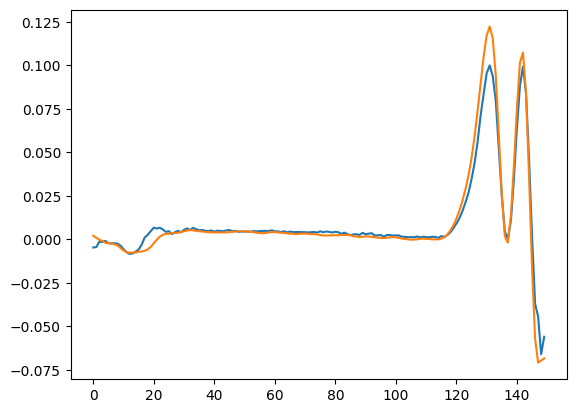

In [39]:
gen_data = generate_data(gen_BG, 10)
plt.plot(gen_data[4].T)
plt.plot(np.squeeze(test_data)[6].T)

In [40]:
generated_batch = generate_data(generator, num_synthetic_to_gen=100)

In [41]:
def save_data_to_csv(data, filepath):
    df = pd.DataFrame(data)
    df.to_csv(filepath)

In [46]:
save_data_to_csv(generated_batch, '../reports/100_TF_ConvNetDisGAN.csv')

In [49]:
data_syn = pd.read_csv("../reports/100_TF_ConvNetDisGAN.csv")

In [50]:
data_synn = data_syn.iloc[:,1:]
data_synn.head(3)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.006082,0.004663,0.005247,0.002896,0.001272,-2.680796e-04,-0.000729,-0.001377,-0.003739,-0.005926,...,0.119440,0.160065,0.193050,0.207705,0.172504,0.139332,0.110630,0.100805,0.132812,0.155062
1,0.006488,0.004997,0.005920,0.004427,0.003782,4.845206e-07,-0.000428,-0.000493,-0.004367,-0.006281,...,0.123873,0.168003,0.202066,0.216852,0.182983,0.150254,0.120250,0.110237,0.145069,0.169972
2,0.006464,0.005011,0.005117,0.003309,0.001576,-1.313472e-04,-0.001137,-0.001551,-0.003703,-0.006370,...,0.121193,0.162933,0.197653,0.213123,0.177163,0.143670,0.114013,0.105190,0.138614,0.160249


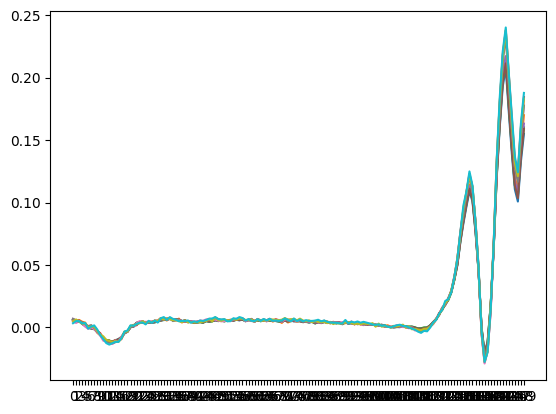

In [51]:
plt.plot(data_synn.head(10).T)